In [21]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('Iris Dataset.csv')

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Scatter plot for SepalLengthCm vs Species

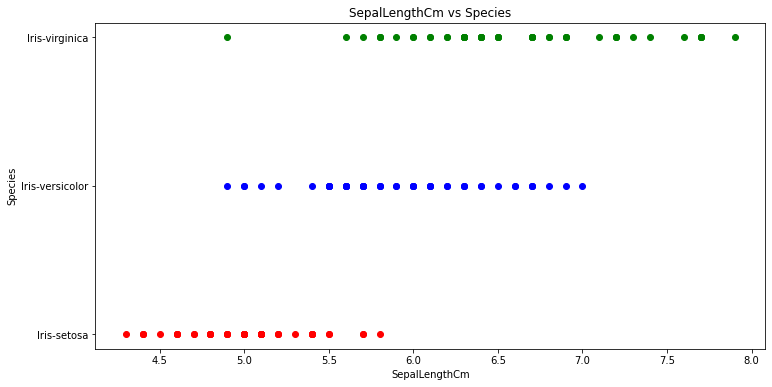

In [24]:
df1 = df[df['Species'] == "Iris-setosa"]
df2 = df[df['Species'] == "Iris-versicolor"]
df3 = df[df['Species'] == "Iris-virginica"]

plt.figure(figsize = (12,6)) , 

plt.scatter(df1['SepalLengthCm'] , df1['Species'] , color = "red" )
plt.scatter(df2['SepalLengthCm'] , df2['Species'] , color = "blue" )
plt.scatter(df3['SepalLengthCm'] , df3['Species'] , color = "green" )

plt.xlabel("SepalLengthCm")
plt.ylabel("Species")
plt.title("SepalLengthCm vs Species")


plt.show()

Bar plot for SepalLengthCm vs Species

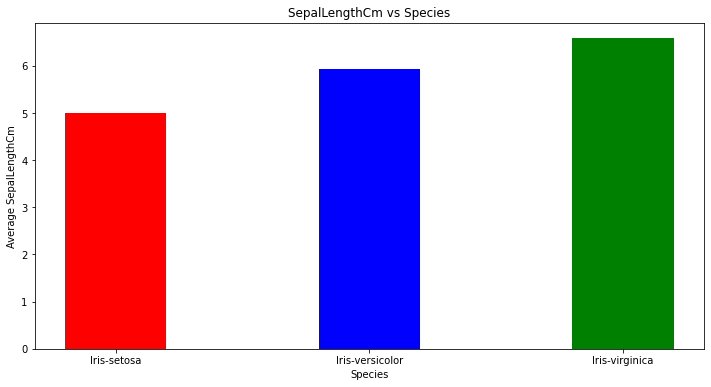

In [25]:
df1 = df[df['Species'] == "Iris-setosa"]
df2 = df[df['Species'] == "Iris-versicolor"]
df3 = df[df['Species'] == "Iris-virginica"]

plt.figure(figsize = (12,6)) , 

plt.bar(df1['Species'] , np.mean(df1['SepalLengthCm'])  , color = "red" , width = 0.4 )
plt.bar(df2['Species'] , np.mean(df2['SepalLengthCm'])  , color = "blue" , width = 0.4)
plt.bar(df3['Species'] , np.mean(df3['SepalLengthCm'])  , color = "green" , width = 0.4)

plt.ylabel("Average SepalLengthCm")
plt.xlabel("Species")
plt.title("SepalLengthCm vs Species")


plt.show()

Bar plot for SepalWidthCm vs Species

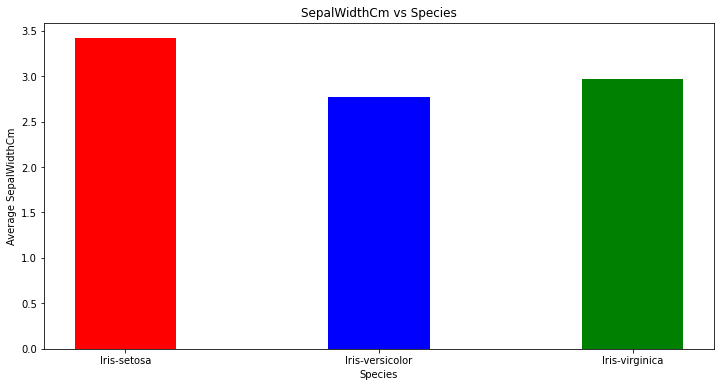

In [26]:
df1 = df[df['Species'] == "Iris-setosa"]
df2 = df[df['Species'] == "Iris-versicolor"]
df3 = df[df['Species'] == "Iris-virginica"]

plt.figure(figsize = (12,6)) , 

plt.bar(df1['Species'] , np.mean(df1['SepalWidthCm'])  , color = "red" , width = 0.4)
plt.bar(df2['Species'] , np.mean(df2['SepalWidthCm'])  , color = "blue" , width = 0.4)
plt.bar(df3['Species'] , np.mean(df3['SepalWidthCm'])  , color = "green" , width = 0.4)

plt.ylabel("Average SepalWidthCm")
plt.xlabel("Species")
plt.title("SepalWidthCm vs Species")

plt.show()

Bar plot for PetalLengthCm vs Species

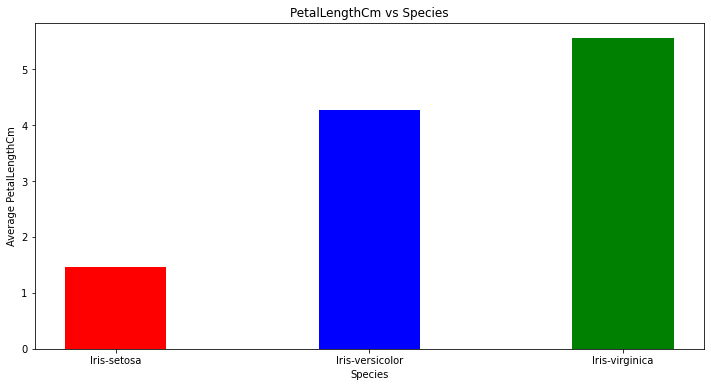

In [27]:
df1 = df[df['Species'] == "Iris-setosa"]
df2 = df[df['Species'] == "Iris-versicolor"]
df3 = df[df['Species'] == "Iris-virginica"]

plt.figure(figsize = (12,6)) , 

plt.bar(df1['Species'] , np.mean(df1['PetalLengthCm'])  , color = "red" , width = 0.4)
plt.bar(df2['Species'] , np.mean(df2['PetalLengthCm'])  , color = "blue" , width = 0.4)
plt.bar(df3['Species'] , np.mean(df3['PetalLengthCm'])  , color = "green" , width = 0.4)

plt.ylabel("Average PetalLengthCm")
plt.xlabel("Species")
plt.title("PetalLengthCm vs Species")

plt.show()

Bar plot for PetalWidthCm vs Species

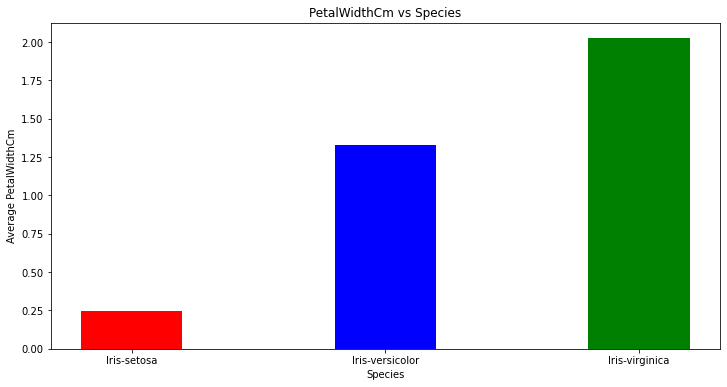

In [28]:
df1 = df[df['Species'] == "Iris-setosa"]
df2 = df[df['Species'] == "Iris-versicolor"]
df3 = df[df['Species'] == "Iris-virginica"]

plt.figure(figsize = (12,6)) , 

plt.bar(df1['Species'] , np.mean(df1['PetalWidthCm'])  , color = "red" , width = 0.4)
plt.bar(df2['Species'] , np.mean(df2['PetalWidthCm'])  , color = "blue" , width = 0.4)
plt.bar(df3['Species'] , np.mean(df3['PetalWidthCm'])  , color = "green" , width = 0.4)

plt.ylabel("Average PetalWidthCm")
plt.xlabel("Species")
plt.title("PetalWidthCm vs Species")

plt.show()

Scaling Numerical Columns 

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df.drop(["Id" , "Species"] , axis = 1))

X = pd.DataFrame( scaled_data , columns = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"] )


In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Code for implementation of PCA

In [ ]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    print("Eigen Values : " , eigen_values)
    print("Eigen Vectors : ", eigen_vectors)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
mat_reduced = PCA(X , 3)

Eigen Values :  [0.00175337 0.00963728 0.03239279 0.23231168]
Eigen Vectors :  [[ 0.36276216  0.71434339  0.42100611 -0.4252893 ]
 [-0.21877734 -0.33510219  0.90470509  0.14612219]
 [-0.78205964  0.06825927 -0.06432645 -0.61610511]
 [ 0.45708076 -0.61054133 -0.01116485 -0.64667752]]


In [ ]:
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2','PC3'])

In [ ]:
principal_df = pd.concat([principal_df , df["Species"]] , axis = 1)

In [ ]:
principal_df.head()

,PC1,PC2,PC3,Species
0,0.630361,0.111556,0.016993,Iris-setosa
1,0.623546,-0.100313,0.047120,Iris-setosa
2,0.669793,-0.047220,-0.021648,Iris-setosa
3,0.654633,-0.098791,-0.025214,Iris-setosa
4,0.648263,0.137558,-0.016813,Iris-setosa


3D Plot for PCA 

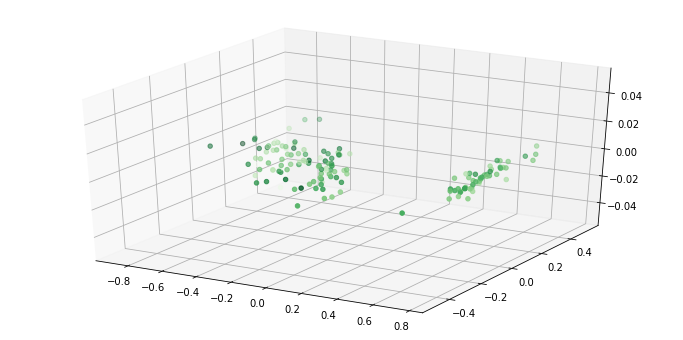

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))
ax = plt.axes(projection='3d')

#ax.plot3D( principal_df['PC1'] , principal_df['PC2'] , principal_df['PC3'] , 'gray')



ax.scatter3D(principal_df['PC1'] , principal_df['PC2'] , c = principal_df['PC3'] , cmap='Greens'  )

plt.show(fig)





2D plot using PC1 and PC2

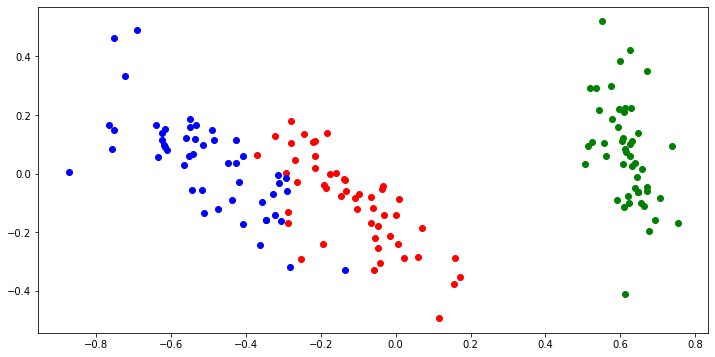

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))

df1 = principal_df[principal_df['Species'] == "Iris-setosa"]
df2 = principal_df[principal_df['Species'] == "Iris-versicolor"]
df3 = principal_df[principal_df['Species'] == "Iris-virginica"]

plt.scatter(df1['PC1'] , df1['PC2'] ,color = "green")
plt.scatter(df2['PC1'] , df2['PC2'] ,color = "red")
plt.scatter(df3['PC1'] , df3['PC2'] ,color = "blue")

plt.show(fig)

## Code for implementation of K-Means algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

colors = 10*["g","r","c","b","k"]
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [ ]:
#X = df.drop(["Species"] , axis = 1)

Plot for K-Means Clustering Algorithm

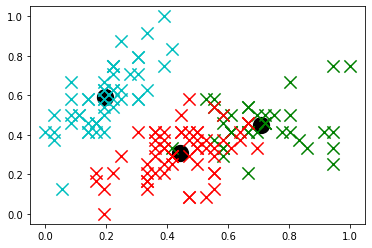

In [ ]:
clf = K_Means()
clf.fit(np.array(X))

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        #print(featureset)
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()
